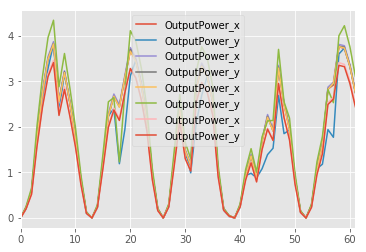

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
df = pd.read_csv('hfile.csv')
df = df.drop_duplicates()
da = df.filter(items=['InverterID', 'LogTime', 'OutputPower'])

def split_machine(mid):
    d  = [row for row in da.itertuples() if row.InverterID == mid]
    df = pd.DataFrame(d)
    df = df.drop('Index', 1)
    df = df.drop('InverterID', 1)
    return df

mdfs = [split_machine(i) for i in range(1, 9)]
#[plt.plot(df.OutputPower) for df in mdfs]
#plt.show()
totalopdf = pd.merge(mdfs[0], mdfs[1], on='LogTime')
for i in range(2,8):
    totalopdf = pd.merge(totalopdf, mdfs[i], on='LogTime')
    
g = totalopdf.plot.line()
plt.show(g)

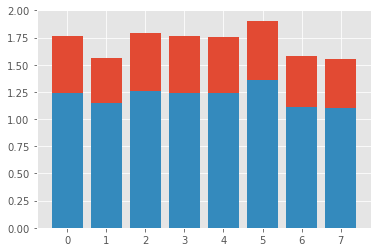

In [170]:
import statistics
mus = [statistics.mean(df.OutputPower) for df in mdfs]
sigmas = [statistics.stdev(df.OutputPower) for df in mdfs]

plt.bar(range(len(mus)), mus)
plt.bar(range(len(sigmas)), sigmas)
plt.show()